In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Toxicity_analysis_neural

/content/drive/MyDrive/Toxicity_analysis_neural


Importing necessary libraries

In [ ]:
!pip install matplotlib-venn

Importing the dataset, Visualization, Pre processing

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as  sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib_venn as venn

color = sns.color_palette()
sns.set_style('dark')
%matplotlib inline


In [ ]:
train_data = pd.read_csv("train.csv")
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
X_train = train_data["comment_text"]
X_train

,comment_text
0,Explanation\nWhy the edits made under my usern...
1,D'aww! He matches this background colour I'm s...
2,"Hey man, I'm really not trying to edit war. It..."
3,"""\nMore\nI can't make any real suggestions on ..."
4,"You, sir, are my hero. Any chance you remember..."
...,...
159566,""":::::And for the second time of asking, when ..."
159567,You should be ashamed of yourself \n\nThat is ...
159568,"Spitzer \n\nUmm, theres no actual article for ..."
159569,And it looks like it was actually you who put ...


In [ ]:
y_train = train_data.iloc[:,2:]
y_train

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [ ]:
y_train[y_train["toxic"] == 1]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,1,1,1,0,1,0
12,1,0,0,0,0,0
16,1,0,0,0,0,0
42,1,0,1,0,1,1
43,1,0,1,0,1,0
...,...,...,...,...,...,...
159494,1,0,1,0,1,1
159514,1,0,0,0,1,0
159541,1,0,1,0,1,0
159546,1,0,0,0,1,0


Checking the count of the various types of words

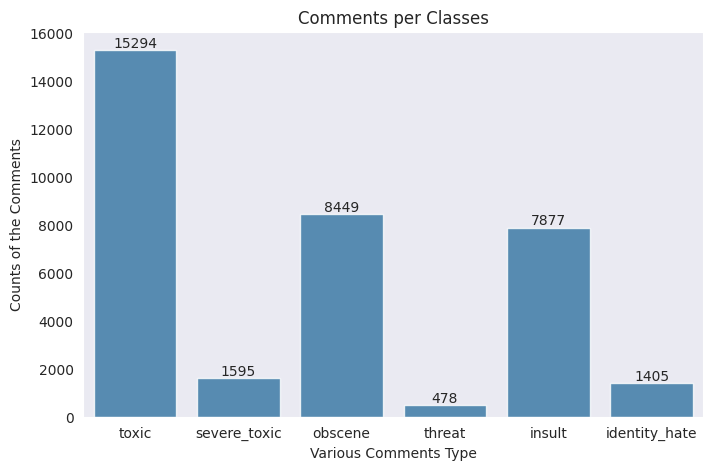

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_train[cols].sum() has already been computed
val_counts = y_train[cols].sum()

plt.figure(figsize=(8,5))
ax = sns.barplot(x=val_counts.index, y=val_counts.values, alpha=0.8)

plt.title("Comments per Classes")
plt.xlabel("Various Comments Type")
plt.ylabel("Counts of the Comments")

# Adding the data labels on the bars
rects = ax.patches
labels = val_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha="center", va="bottom")

plt.show()

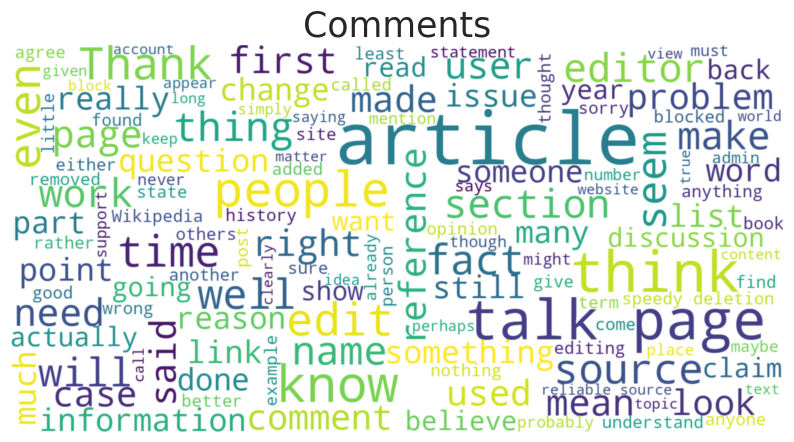

In [ ]:
#from wordcloud import WordCloud
words = ' '.join([text for text in X_train])


word_cloud = WordCloud(
                       width=1600,
                       height=800,
                       #colormap='PuRd',
                       margin=0,
                       max_words=600, # Maximum numbers of words we want to see
                       min_word_length=4, # Minimum numbers of letters of each word to be part of the cloud
                       max_font_size=150, min_font_size=30,  # Font size range
                       background_color="white").generate(words)

plt.figure(figsize=(10, 16))
plt.imshow(word_cloud, interpolation="gaussian")
plt.title('Comments', fontsize = 25)
plt.axis("off")
plt.show()

Tokenization

In [ ]:
tokenizer = keras.preprocessing.text.Tokenizer()

In [ ]:
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train, maxlen=100)

In [ ]:
X_train.shape

(159571, 100)

Trainng

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(20, activation="tanh"),
    keras.layers.Dense(6, activation="softmax")
])

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
model_history = model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val))

Epoch 1/25
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9869 - loss: 0.3549 - val_accuracy: 0.9904 - val_loss: 0.3601
Epoch 2/25
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9895 - loss: 0.3574 - val_accuracy: 0.9894 - val_loss: 0.3636
Epoch 3/25
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9905 - loss: 0.3566 - val_accuracy: 0.9912 - val_loss: 0.3600
Epoch 4/25
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9914 - loss: 0.3652 - val_accuracy: 0.9912 - val_loss: 0.3661
Epoch 5/25
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9916 - loss: 0.3632 - val_accuracy: 0.9911 - val_loss: 0.3633
Epoch 6/25
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9913 - loss: 0.3603 - val_accuracy: 0.9868 - val_loss: 0.3634
Epoch 7/25
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9918 - loss: 0.3494 - val_accuracy: 0.9924 - val_loss: 0.3617
Epoch 8/25
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9918 - loss: 0.3591 

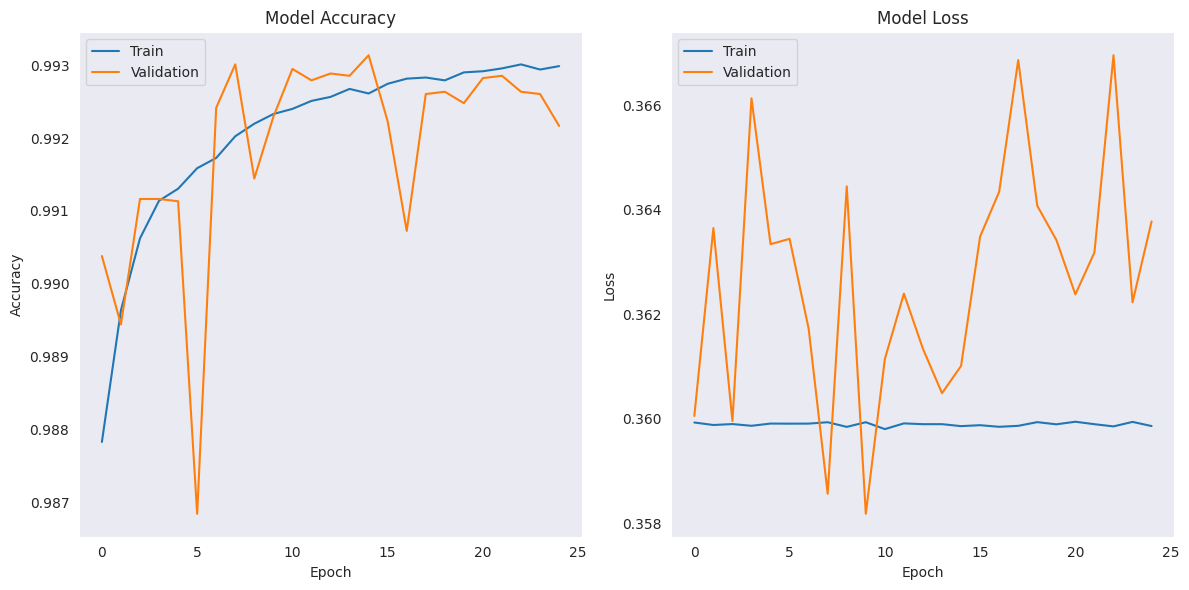

In [ ]:
import matplotlib.pyplot as plt

# Plotting Accuracy
plt.figure(figsize=(12, 6))

# First subplot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Second subplot for Loss
plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Display both plots
plt.tight_layout()
plt.show()


In [ ]:
model.save('final_model.h5')

Evaluation of the model

In [ ]:
test_data = pd.read_csv('test.csv')

In [ ]:
test_data.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
X_test = test_data['comment_text']

In [ ]:
X_test

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.
...,...
153159,". \n i totally agree, this stuff is nothing bu..."
153160,== Throw from out field to home plate. == \n\n...
153161,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,""" \n\n == """"One of the founding nations of the..."


In [ ]:
type(test_data['comment_text'])

pandas.core.series.Series

In [ ]:
tokenizer2 = keras.preprocessing.text.Tokenizer()
tokenizer2.fit_on_texts(X_test)
X_test = tokenizer2.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=100)
X_test[0]

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,   1614,    227,   3383,    812,      8,     56,
        32384,     82,    884,    337,     16,   3782,     69,     20,
            6,      5,   5515,      6,   1585, 106851,      7,     54,
          227,   6234,   1190, 106852,    500,   5001,      5,     93,
            6,      2,   2999,     32,    279,      6,    762,  29767,
           42,   3383,    812,      8,     35,   4342,     10,    737,
          636,    348,    507,  15299,      9,    171,     15,    158,
            5,  15732,      8,    253,  19272,     44,   2607,     52,
           24,      3,   2225,    154,   1973,    500,   2110,     93,
          219,    144,    486,     84], dtype=int32)

In [ ]:
y_test = pd.read_csv('test_labels.csv')
y_test = y_test.iloc[:, 1:]
y_test

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1
2,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1
4,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...
153159,-1,-1,-1,-1,-1,-1
153160,-1,-1,-1,-1,-1,-1
153161,-1,-1,-1,-1,-1,-1
153162,-1,-1,-1,-1,-1,-1


In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test accuracy:", results[1])

Evaluate on test data
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9973 - loss: -6.1661
test accuracy: 0.9965069890022278
